#Librerías

In [ ]:
pip install resnet

  Created wheel for resnet: filename=resnet-0.1-py3-none-any.whl size=10041 sha256=20266df3d65b53663d59879b7c867b9779b84ffd0984b5c54319212f3ec68d3f
  Stored in directory: /root/.cache/pip/wheels/38/23/58/6e83e34ced7d4772b88e2e86305f94a1ca497bd87937f5e7ec
Successfully built resnet


In [ ]:
from keras.applications.resnet import ResNet50

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization, Lambda, Input, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, Reshape, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, LearningRateScheduler, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilnet 
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Cargamos los datos

In [ ]:
X_train = np.load('/content/drive/MyDrive/Redes TPS/TP3/Data/X_train.npy')/255
Y_train = np.load('/content/drive/MyDrive/Redes TPS/TP3/Data/y_train.npy')
X_test = np.load('/content/drive/MyDrive/Redes TPS/TP3/Data/X_test.npy')/255

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


Transformamos la clasificación (100 clases) en un vector binario con One Hot Encoding

In [ ]:
Y_train = to_categorical(Y_train)

Son imágenes RGB de 32x32 píxeles, es decir, de muy poca resolución. 


## Graficamos algunas imágenes

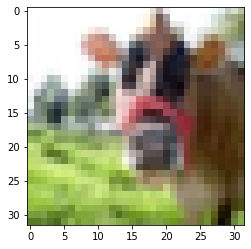

In [ ]:
plt.imshow(X_train[0])

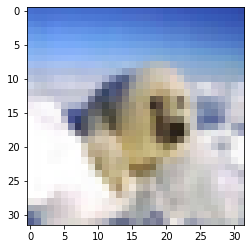

In [ ]:
plt.imshow(X_train[62])

In [ ]:
print(Y_train[1])

[29]


In [ ]:
print(Y_train[62])

[72]


#Data Augmentation

In [ ]:
batch = 64
lr = 0.001
loss = 'categorical_crossentropy'
optimizer = SGD(learning_rate=lr)#Adam(learning_rate=lr)
metrics = ['Accuracy']



There are many types of data augmentation that could be applied. Given that the dataset is comprised of small photos of objects, we do not want to use augmentation that distorts the images too much, so that useful features in the images can be preserved and used.

The types of random augmentations that could be useful include a horizontal flip, minor shifts of the image, and perhaps small zooming or cropping of the image.

In [ ]:
nb_train_samples = 50000
nb_validation_samples = 10000
batch= 64

In [ ]:
# create data generator
datagen = ImageDataGenerator(zoom_range=0.2, rotation_range = 5, horizontal_flip=True, 
                             vertical_flip = True,  validation_split=0.2) #fill_mode = "nearest",width_shift_range=2, height_shift_range=2, brightness_range=[0.95,1.3],
# prepare iterator
it_train = datagen.flow(X_train, Y_train,shuffle=True, seed=42, batch_size=batch, subset='training')
it_valid = datagen.flow(X_train, Y_train,shuffle=True, seed=42, batch_size=batch, subset='validation')

In [ ]:
len(it_train), len(it_valid), it_train

(625, 157, <keras.preprocessing.image.NumpyArrayIterator at 0x7fcb7790cfd0>)

#Modelo 

In [ ]:
model = ResNet50(include_top=False,weights="imagenet", input_shape=(32,32,3), classes=100 )

In [ ]:
for layer in model.layers:
  layer.trainable = False #congelo los pesos de la resnet, no se entrene. Para agregarle las capas al final

In [ ]:
input_layer = model.layers[0].input

In [ ]:
output_resnet = model.layers[-1].output

In [ ]:
x = GlobalAveragePooling2D()(output_resnet)
x = Dense(100, activation="softmax")(x)

In [ ]:
model_2 = Model(inputs=input_layer,outputs=x)

NameError: ignored

In [ ]:
epochs = 20
batch = 64
lr = 0.000001
loss = 'categorical_crossentropy'
optimizer = Adam(learning_rate=lr)
metrics = ['Accuracy']


In [ ]:
model_2.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Redes TPS/TP3/bestmodel_dag_1.hdf5', monitor='val_Accuracy', mode = 'max', verbose=1, save_best_only=True)
history = model_2.fit_generator(it_train, validation_data=it_valid, validation_steps= nb_validation_samples//batch, epochs=epochs, callbacks=checkpoint)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
625/625 [==============================] - ETA: 0s - loss: 4.2635 - Accuracy: 0.1235
Epoch 00001: val_Accuracy improved from -inf to 0.01072, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_dag_1.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


625/625 [==============================] - 94s 135ms/step - loss: 4.2635 - Accuracy: 0.1235 - val_loss: 107.9275 - val_Accuracy: 0.0107
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 3.5155 - Accuracy: 0.1919
Epoch 00002: val_Accuracy improved from 0.01072 to 0.19772, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_dag_1.hdf5
625/625 [==============================] - 83s 133ms/step - loss: 3.5155 - Accuracy: 0.1919 - val_loss: 3.6608 - val_Accuracy: 0.1977
Epoch 3/100
625/625 [==============================] - ETA: 0s - loss: 2.7370 - Accuracy: 0.3022
Epoch 00003: val_Accuracy improved from 0.19772 to 0.28165, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_dag_1.hdf5
625/625 [==============================] - 83s 133ms/step - loss: 2.7370 - Accuracy: 0.3022 - val_loss: 2.9008 - val_Accuracy: 0.2817
Epoch 4/100
625/625 [==============================] - ETA: 0s - loss: 2.4343 - Accuracy: 0.3634
Epoch 00004: val_Accuracy did not imp

#Con dropout + Batch Normalization más capas - Variamos los valores de dropout

In [ ]:
model_7 = Sequential()
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5))
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5))
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.25))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.1))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Flatten())
model_7.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_7.add(Dropout(0.2))
model_7.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_7.add(Dropout(0.2))
model_7.add(Dense(100, activation='softmax'))

In [ ]:
epochs = 60 #si no 50
batch = 64
lr = 0.001
loss = 'categorical_crossentropy'
optimizer = Adam(lr=lr)
metrics = ['Accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_7.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
epochs =20

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Redes TPS/TP3/bestmodel_dbn_2.hdf5', monitor='val_Accuracy', mode = 'max', verbose=1, save_best_only=True)
history = model_7.fit_generator(it_train, validation_data=it_valid, validation_steps= nb_validation_samples//batch, epochs=epochs, callbacks=checkpoint)

Epoch 1/20
  2/625 [..............................] - ETA: 32s - loss: 1.3327 - Accuracy: 0.6016

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


625/625 [==============================] - ETA: 0s - loss: 1.2766 - Accuracy: 0.6461
Epoch 00001: val_Accuracy improved from -inf to 0.51803, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_dbn_2.hdf5
625/625 [==============================] - 37s 60ms/step - loss: 1.2766 - Accuracy: 0.6461 - val_loss: 1.9580 - val_Accuracy: 0.5180
Epoch 2/20
625/625 [==============================] - ETA: 0s - loss: 1.2884 - Accuracy: 0.6436
Epoch 00002: val_Accuracy did not improve from 0.51803
625/625 [==============================] - 37s 59ms/step - loss: 1.2884 - Accuracy: 0.6436 - val_loss: 2.0818 - val_Accuracy: 0.5035
Epoch 3/20
625/625 [==============================] - ETA: 0s - loss: 1.2768 - Accuracy: 0.6453
Epoch 00003: val_Accuracy did not improve from 0.51803
625/625 [==============================] - 37s 59ms/step - loss: 1.2768 - Accuracy: 0.6453 - val_loss: 2.1165 - val_Accuracy: 0.4956
Epoch 4/20
625/625 [==============================] - ETA: 0s - loss: 1.2750 - Accu

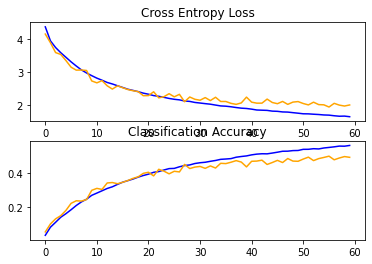

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model_7.load_weights('/content/drive/MyDrive/Redes TPS/TP3/bestmodel_dbn.hdf5')

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model_7.load_weights('/content/drive/MyDrive/Redes TPS/TP3/bestmodel_dbn_2.hdf5')

#VGG

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
model = VGG16(include_top=False,weights="imagenet", input_shape=(32,32,3), classes=100 )

In [ ]:
input_layer = model.layers[0].input

In [ ]:
output_resnet = model.layers[-1].output

In [ ]:
x = GlobalAveragePooling2D()(output_resnet)
x = Dense(100, activation="softmax")(x)

In [ ]:
model_3 = Model(inputs=input_layer,outputs=x)

In [ ]:
epochs = 100
batch = 64
loss = 'categorical_crossentropy'
optimizer = SGD()
metrics = ['Accuracy']

In [ ]:
model_3.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Redes TPS/TP3/bestmodel_VGG_3.hdf5', monitor='val_Accuracy', mode = 'max', verbose=1, save_best_only=True)
history = model_3.fit_generator(it_train, validation_data=it_valid, validation_steps= nb_validation_samples//batch, epochs=epochs, callbacks=checkpoint)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
625/625 [==============================] - ETA: 0s - loss: 3.5162 - Accuracy: 0.1740
Epoch 00001: val_Accuracy improved from -inf to 0.29167, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_VGG_3.hdf5
625/625 [==============================] - 57s 90ms/step - loss: 3.5162 - Accuracy: 0.1740 - val_loss: 2.8132 - val_Accuracy: 0.2917
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 2.5843 - Accuracy: 0.3293
Epoch 00002: val_Accuracy improved from 0.29167 to 0.38772, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_VGG_3.hdf5
625/625 [==============================] - 56s 89ms/step - loss: 2.5843 - Accuracy: 0.3293 - val_loss: 2.3174 - val_Accuracy: 0.3877
Epoch 3/100
625/625 [==============================] - ETA: 0s - loss: 2.2710 - Accuracy: 0.3959
Epoch 00003: val_Accuracy improved from 0.38772 to 0.41016, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_VGG_3.hdf5
625/625 [==============================] - 5

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model_3.load_weights('/content/drive/MyDrive/Redes TPS/TP3/bestmodel_VGG_3.hdf5')

#Generamos el submit

In [ ]:
model_3.evaluate(X_train,Y_train)

1563/1563 [==============================] - 33s 21ms/step - loss: 0.6255 - Accuracy: 0.9231


[0.6255412697792053, 0.9230999946594238]

In [ ]:
y_pred = model_3.predict(X_test)

In [ ]:
y_final = y_pred.argmax(axis=1)

In [ ]:
df = pd.DataFrame(data=y_final, columns = ['label'])
df.index.name='Id'

In [ ]:
df

In [ ]:
df.to_csv('/content/drive/MyDrive/Redes TPS/TP3/submission_vgg_2.csv')

#Resultado en kaggle

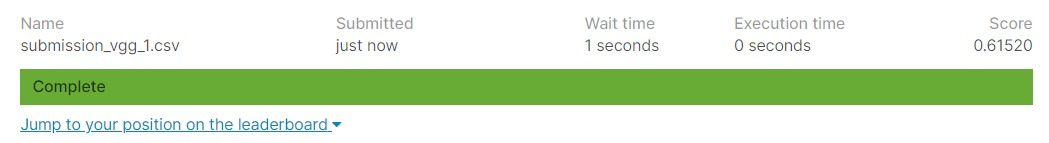